In [1]:
%run "../head.py"

In [2]:
import pandas as pd
import plotly
import xarray as xr
from hic_basic.hicio import read_meta, load_pickle, load_json
from hires_utils.hires_io import parse_3dg
from hic_basic.wet.meta_trick import merge_meta
from lib.struct import voxelize, mix_layer
from lib.screen import vcs_single_cell_density, single_slice_density_xr

def plot_single_voxel_clip(voxels, clip, axis, **kwargs):
    data = voxels.sel(
        **{axis:clip}
    ).to_series()
    fig = single_slice_density_xr(
        data,
        cmap = plotly.colors.sequential.Viridis,
        # kwargs for plot_figure_canvas
        fill = 0,
        step = 1,
        square_size = 50,
        **h.template.layout.coloraxis.to_plotly_json(),
        **kwargs
    )
    fig.update_layout(
        template = h.svg_heatmap_template,
        height = h.template.layout.height,
        width = h.template.layout.width,
        title = "",
    )
    return fig

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [10]:
if h.version in ["0","1"]:
    # meta
    meta = read_meta("../A_meta/meta/tillsperm55.meta.csv.gz")
    Sperm_hg_meta = read_meta("../A_meta/meta/tillsperm62_hg.meta.csv.gz")
    # primary views
    primary_views = load_pickle(h.dsdir / "primary_views/Sperm.64.pkl")
    Sperm_hg_primary_views = load_pickle(h.dsdir / "primary_views/Sperm_hg.64.pkl")
    # good samples
    ga = load_json(f"../Fig1S_structure_quality/Sperm_ga.v{h.version}.json")
    Sperm_hg_ga = load_json(f"../Fig1S_structure_quality/Sperm_hg_ga.v{h.version}.json")
    # targets
    Sperm_targets = pd.read_csv(
        f"../B_auto_alignment/Sperm.round1.targets.v{h.version}.csv",
        index_col = 0,
    )
    Sperm_targets.columns = ["ht", "dv", "lr"]
    Sperm_hg_targets = pd.read_csv(
        f"../B_auto_alignment/Sperm_hg.round1.targets.v{h.version}.csv",
        index_col = 0,
    )
    # merge
    meta = merge_meta(meta, Sperm_hg_meta)
    targets = pd.concat([Sperm_targets, Sperm_hg_targets],axis=0)
    primary_views.update(Sperm_hg_primary_views)
elif h.version == "2":
    # meta
    meta = read_meta(h.base / "notebooks/A_meta/meta/All_formal.meta.csv.gz")
    # primary_views
    primary_views = {}
    primary_views.update(load_pickle(h.dsdir / "primary_views/Sperm.64.pkl"))
    primary_views.update(load_pickle(h.dsdir / "primary_views/Sperm_hg.64.pkl"))
    ga = load_json(h.fig1 / f"Fig1S_structure_quality/Sperm_ga.v{h.version}.json")
    Sperm_hg_ga = load_json(h.fig1 / f"Fig1S_structure_quality/Sperm_hg_ga.v{h.version}.json")
    # targets
    Sperm_targets = pd.read_csv(
        h.base / f"notebooks/B_auto_alignment/Sperm.round1.targets.v{h.version}.csv",
        index_col = 0,
    )
    Sperm_targets.columns = ["ht", "dv", "lr"]
    Sperm_hg_targets = pd.read_csv(
        h.base / f"notebooks/B_auto_alignment/Sperm_hg.round1.targets.v{h.version}.csv",
        index_col = 0,
    )
    targets = pd.concat([Sperm_targets, Sperm_hg_targets],axis=0)


In [18]:
import random
random.seed(12)
selected_mouse = random.sample(ga, 20)
selected_human = random.sample(Sperm_hg_ga, 20)

In [19]:
import shutil

lr_pat = "/shareb/ychi/repo/sperm_struct/ds_pipeline/smk/pymol_surface_territory/{sample}.lr.png"
dv_pat = "/shareb/ychi/repo/sperm_struct/ds_pipeline/smk/pymol_surface_territory/{sample}.dv.png"
for sample in selected_mouse:
    shutil.copy(lr_pat.format(sample=sample), f"mouse/{sample}.lr.png")
for sample in selected_human:
    shutil.copy(lr_pat.format(sample=sample), f"human/{sample}.lr.png")
    shutil.copy(dv_pat.format(sample=sample), f"human/{sample}.dv.png")

### mouse sperm

In [4]:
# Try in subplots

# sample = "BJ8019"

# _3dg = parse_3dg(meta.loc[sample,"20k_g_struct1"])
# primary_view = primary_views[sample]
# target = targets.loc[sample]
# threshold=0
# voxel = voxelize(_3dg, primary_view, target, step=1, plot=True, observed=True, lr90=False)
# x_voxel = xr.DataArray.from_series(voxel)

# fig = vcs_single_cell_density(
#     mix_layer(x_voxel.fillna(0)),
#     #mix_layer(x_voxel),
#     [-8,-6,-4,-2,0,2,4,6],
#     axis="lr",
#     rows=1,
#     cols=8,
#     cmap = plotly.colors.sequential.Viridis,
# )
# fig.update_layout(
#     template = h.template,
#     height = 250,
#     width = 900,
#     title = "Slices of a signle mouse sperm structure",
#     plot_bgcolor = "rgba(0,0,0,0)",
# )
# fig.show(renderer="png")

In [4]:
sample = "BJ8019"

_3dg = parse_3dg(meta.loc[sample,"20k_g_struct1"])
primary_view = primary_views[sample]
target = targets.loc[sample]
threshold=0
voxel = voxelize(_3dg, primary_view, target, step=1, plot=True, observed=True, lr90=False)
x_voxel = xr.DataArray.from_series(voxel)
Sperm_x_voxel = x_voxel

In [5]:

#sample = Sperm_hg_ga[10]
sample = Sperm_hg_ga[20]
print(sample)

_3dg = parse_3dg(meta.loc[sample,"20k_g_struct1"])
primary_view = primary_views[sample]
target = targets.loc[sample]
threshold=0
voxel = voxelize(_3dg, primary_view, target, step=1, plot=True, observed=True, lr90=False)
x_voxel = xr.DataArray.from_series(voxel)
Sperm_hg_x_voxel = x_voxel

HuS02_HuSZ015


In [7]:
ext = "pdf"
#voxels_list = [mix_layer(Sperm_x_voxel.fillna(0))] * 8 + [mix_layer(Sperm_hg_x_voxel.fillna(0))] * 8
#voxels_list = [mix_layer(Sperm_x_voxel.fillna(0))] * 4 + [mix_layer(Sperm_hg_x_voxel.fillna(0))] * 4
voxels_list = [Sperm_x_voxel.fillna(0)] * 4 + [Sperm_hg_x_voxel.fillna(0)] * 4
#voxel_list = Sperm_x_voxel.fillna(0), Sperm_hg_x_voxel.fillna(0)
#clips = [-8, -6 , -4, -2, 0, 2, 4, 6] + [-16, -12, -8, -4, 0, 4, 8, 12]
# clips = [-8, -6, 0, 4] + [-16, -8, 0, 8] 
clips = [-8, -4, 0, 4] + [-12, -6, 0, 6]
zmins = [0] * 8
zmaxs = [10] * 4 + [8] * 4
# outfiles = [f"Sperm_sc_slice_{clip}.png" for clip in [-8, -6 , -4, -2, 0, 2, 4, 6]] + \
#     [f"Sperm_hg_sc_slice_{clip}.png" for clip in [-16, -12, -8, -4, 0, 4, 8, 12]]
# outfiles = [f"Sperm_sc_slice_{clip}.{ext}" for clip in [-8, -6, 0, 4]] + \
#     [f"Sperm_hg_sc_slice_{clip}.{ext}" for clip in [-16, -8, 0, 8]]
outfiles = [f"Sperm_sc_slice_{clip}.{ext}" for clip in [-8, -4, 0, 4]] + \
    [f"Sperm_hg_sc_slice_{clip}.{ext}" for clip in [-12, -6, 0, 6]]
axis = "lr"

for voxels, clip, outfile, zmin, zmax in zip(voxels_list, clips, outfiles, zmins, zmaxs):
    fig = plot_single_voxel_clip(voxels, clip, axis, zmin=zmin, zmax=zmax, showscale=False)
    fig.update_xaxes(
        tickvals = [-40,0,40],
        ticktext = ["-40","0","40"],
        showticklabels = False,
        mirror = True,
        ticklen = 18
    )
    fig.update_yaxes(
        tickvals = [-40,0,40],
        ticktext = ["-40","0","40"],
        showticklabels = False,
        mirror = True,
        ticklen = 18
    )
    #fig.update_traces(showscale=False)
    fig.write_image(
        "output/" + outfile,
    )

### human sperm

HuS02_HuSZ015


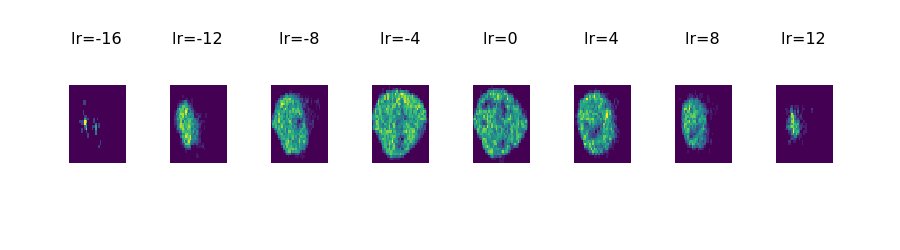

In [17]:

#sample = Sperm_hg_ga[10]
#sample = Sperm_hg_ga[16]
sample = Sperm_hg_ga[20]
print(sample)

_3dg = parse_3dg(meta.loc[sample,"20k_g_struct1"])
primary_view = primary_views[sample]
target = targets.loc[sample]
threshold=0
voxel = voxelize(_3dg, primary_view, target, step=1, plot=True, observed=True, lr90=True)
x_voxel = xr.DataArray.from_series(voxel)


fig = vcs_single_cell_density(
    mix_layer(x_voxel.fillna(0)),
    #mix_layer(x_voxel),
    [-16,-12,-8,-4,0,4,8,12],
    axis="lr",
    rows=1,
    cols=8,
    cmap = plotly.colors.sequential.Viridis,
)
fig.update_layout(
    template = h.template,
    height = 250,
    width = 900,
    title = "Slices of a single human sperm structure",
    plot_bgcolor = "rgba(0,0,0,0)",
)
fig.show(renderer="png")

### mouse sperm 2-chromocenter

In [7]:
sample = "BJ8001"

_3dg = parse_3dg(meta.loc[sample,"20k_g_struct1"])
primary_view = primary_views[sample]
target = targets.loc[sample]
threshold=0
voxel = voxelize(_3dg, primary_view, target, step=1, plot=True, observed=True, lr90=True)
x_voxel = xr.DataArray.from_series(voxel)

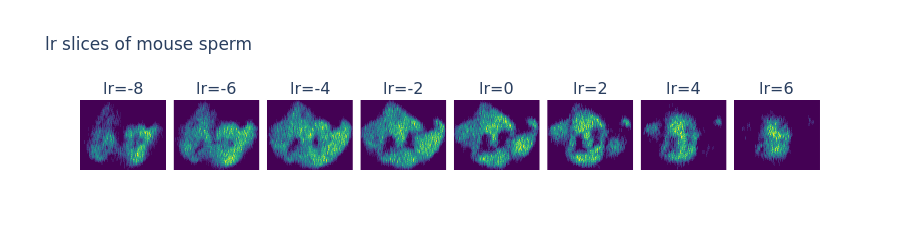

In [8]:
fig = vcs_single_cell_density(
    mix_layer(x_voxel.fillna(0)),
    #mix_layer(x_voxel),
    [-8,-6,-4,-2,0,2,4,6],
    axis="lr",
    rows=1,
    cols=8,
    cmap = plotly.colors.sequential.Viridis,
)
fig.update_layout(
    height = 250,
    width = 900,
    title = "lr slices of mouse sperm",
    plot_bgcolor = "rgba(0,0,0,0)",
)
fig.show(renderer="png")